## Aunalytics Data Science Exerise 
### James Tian
### 10-12-2022

#### Part 1. Data Preprocessing

In [2]:
import pandas as pd 
import numpy as np 
import os

In [64]:
#Load dataset 
train = pd.read_csv('/Users/jinyaotian/Desktop/Aunalytics/au_train.csv')
test = pd.read_csv('/Users/jinyaotian/Desktop/Aunalytics/au_test.csv')

In [4]:
#data dimension
print(train.shape)
print(test.shape)

(32561, 15)
(16281, 15)


In [5]:
train.head(6)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [66]:
#Drop duplicates
train.drop_duplicates(inplace= True, ignore_index= True)
test.drop_duplicates(inplace= True, ignore_index= True)

Notice that there are many hidden missing values, shown as '?' within dataset. Below, let's transform all '?' type data into Nonetype value.

In [67]:
columns  = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'class']
#Train dataset
for i in range(len(train)):
    for item in columns:
        if train.loc[i, item] is not None and '?' in train.loc[i, item]:
            train.loc[i, item] = None

In [68]:
#Test dataset
for i in range(len(test)):
    for item in columns:
        if test.loc[i, item] is not None and '?' in test.loc[i, item]:
            test.loc[i, item] = None

In [69]:
#Drop Nan
train.dropna(axis = 0, how='any', inplace= True)
train.reset_index(inplace= True)
test.dropna(axis= 0, how = 'any', inplace= True)
test.reset_index(inplace= True)


,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15050,16270,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
15051,16271,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
15052,16273,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
15053,16274,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


Continuous variables: age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week

Categorical variables: workclass, marital-status, occupation, relationship, race, sex, native-country

#### visualization of data for better understanding and features selection

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import title
sns.set_theme(style="whitegrid")
sns.set(font_scale = 0.8)

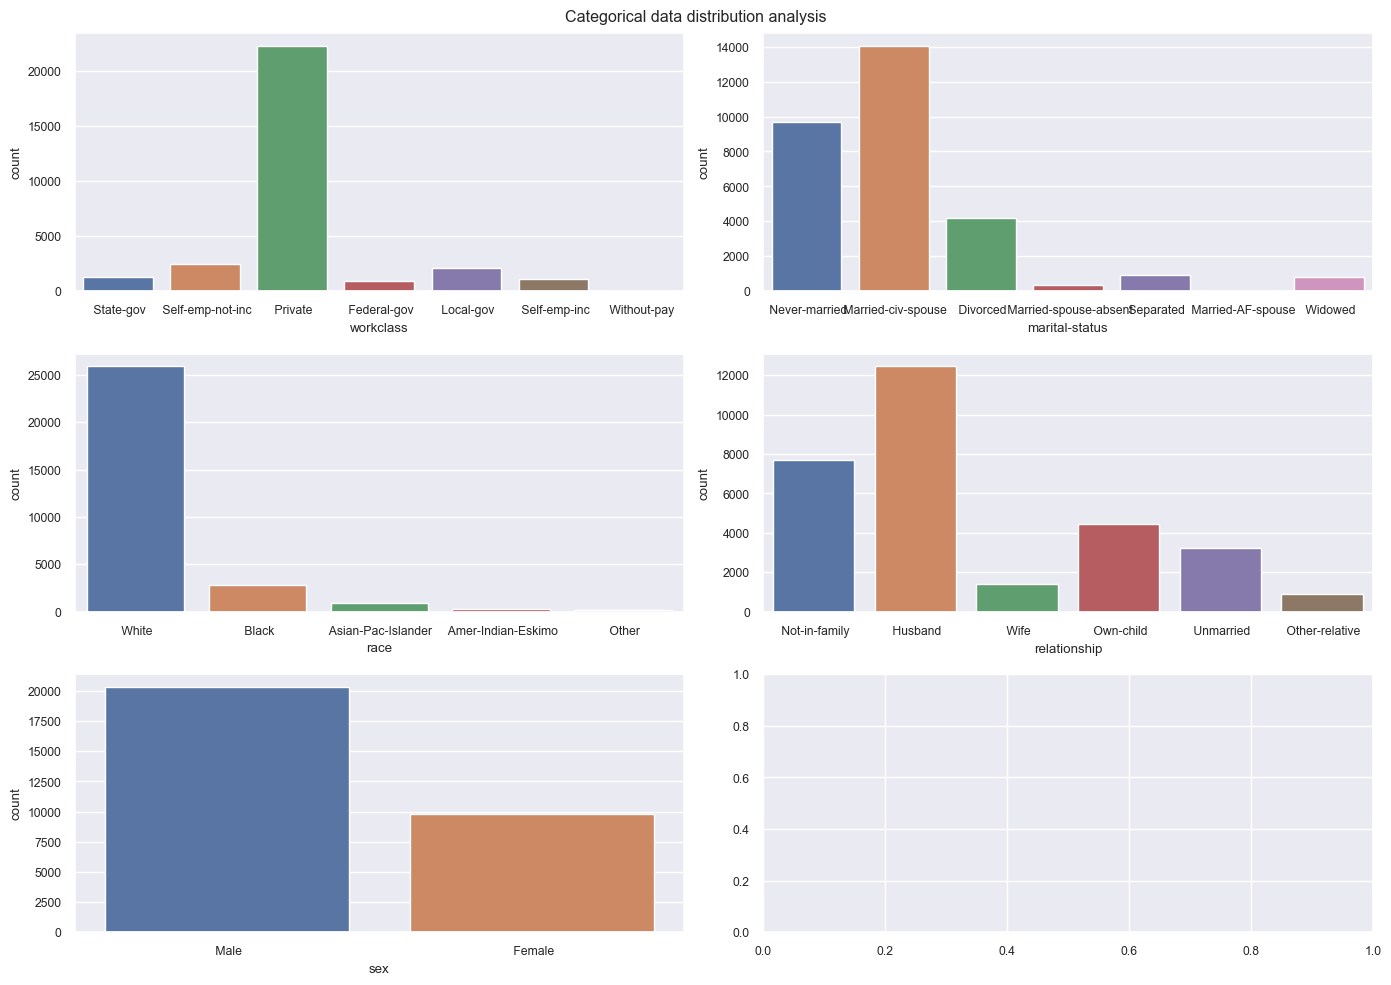

In [82]:
#Categorical data distribution analysis
fig, axes  = plt.subplots(3,2, figsize = (14,10))
fig.suptitle('Categorical data distribution analysis')

#workclass
sns.countplot(ax = axes[0,0], data= train, x = 'workclass')
#marital-status
sns.countplot(ax = axes[0,1], data= train, x = 'marital-status')
#Race 
sns.countplot(ax = axes[1,0], data= train, x = 'race')
#Relationship
sns.countplot(ax = axes[1,1], data= train, x = 'relationship')
#Sex
sns.countplot(ax = axes[2,0], data= train, x = 'sex')
plt.tight_layout()
plt.show()

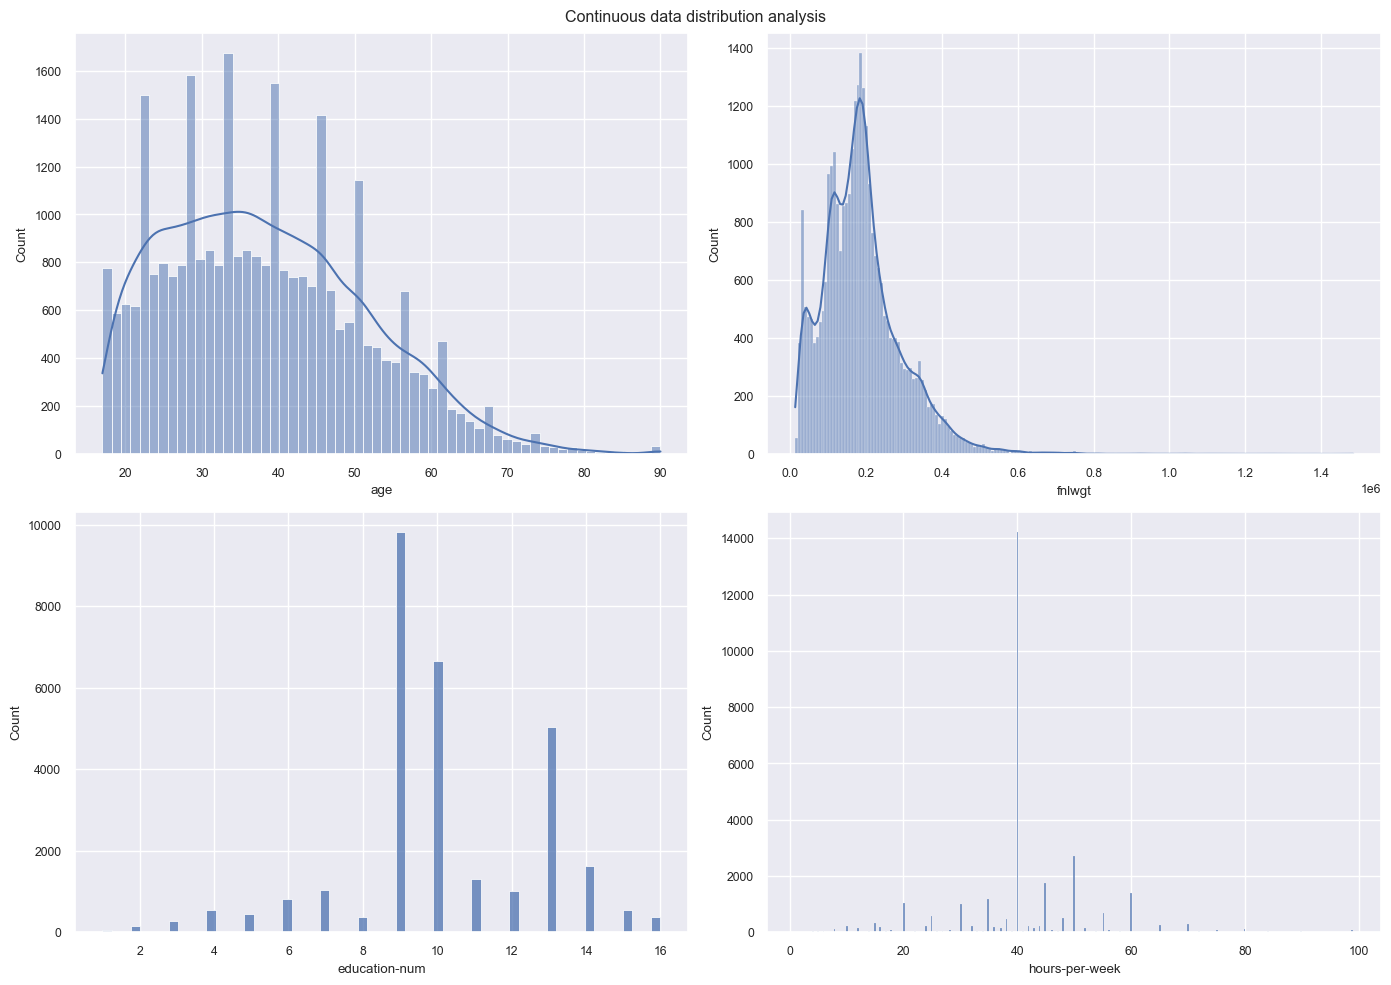

In [86]:
fig, axes  = plt.subplots(2,2, figsize = (14,10))
fig.suptitle('Continuous data distribution analysis')

#age
sns.histplot(ax = axes[0,0], data= train, x = 'age', kde= True)
#fnlwgt
sns.histplot(ax = axes[0,1], data= train, x = 'fnlwgt', kde= True)
#education-num
sns.histplot(ax = axes[1,0], data= train, x = 'education-num')
#hours-per-week
sns.histplot(ax = axes[1,1], data= train, x = 'hours-per-week')
plt.tight_layout()
plt.show()

Native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands;

Let's group them by continent:

Note: We can also group them by economical development level, such as developing country/ developed country.

In [27]:
#Continent
North_America = [' United-States', ' Puerto-Rico', ' Canada', ' Outlying-US(Guam-USVI-etc)', ' Cuba', ' Honduras', ' Jamaica', ' Mexico', ' Dominican-Republic', 
                  ' Haiti', ' Guatemala', ' Nicaragua', ' El-Salvador']
Asia = [' Cambodia', ' India', ' Japan', ' China', ' Iran', ' Philippines', ' Vietnam', ' Laos', ' Taiwan', ' Thailand', ' Hong']
Europe = [' England', ' Greece', ' Germany', ' Italy', ' Poland', ' Portugal', ' Ireland', ' France', ' Hungary', ' Scotland', ' Yugoslavia', ' Holand-Netherlands']
South_America = [' South', ' Ecuador', ' Columbia', ' Trinadad&Tobago', ' Peru']

In [73]:
#Add new column to store continent information
#Train
train_continent = []
for country in train['native-country'].values.tolist():
    if country in North_America:
        train_continent.append('North_America')
    elif country in Asia: 
        train_continent.append('Asia')
    elif country in Europe: 
        train_continent.append('Europe')
    elif country in South_America:
        train_continent.append('South_America')
    else: 
        train_continent.append('Unknow')
#Test
test_continent = []
for country in test['native-country'].values.tolist():
    if country in North_America:
        test_continent.append('North_America')
    elif country in Asia: 
        test_continent.append('Asia')
    elif country in Europe: 
        test_continent.append('Europe')
    elif country in South_America:
        test_continent.append('South_America')
    else: 
        test_continent.append('Unknow')

#Insert new column into df
train['continent'] = train_continent
test['continent'] = test_continent 

<AxesSubplot:xlabel='continent', ylabel='count'>

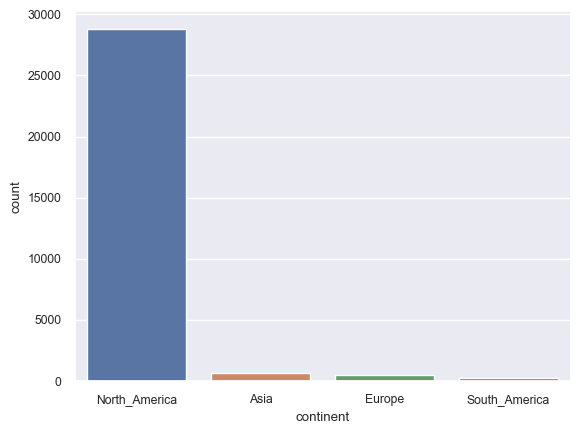

In [29]:
sns.countplot(data= train, x = 'continent')

We can see that people are mostly from North_America

Target data: (binary transformation) 

' <=50K' -> 0 

' >50K' -> 1

In [74]:
#Train
for i, item in enumerate(train['class'].values):
    if item == ' <=50K':
        train.loc[i, 'class'] = 0
    else: 
        train.loc[i, 'class'] = 1 

#Test
for i, item in enumerate(test['class'].values):
    if '<=50K' in item:
        test.loc[i, 'class'] = 0
    else: 
        test.loc[i, 'class'] = 1 

##### One-hot encoding

In [42]:
#Features selection
#Notice that 'education' and 'education-num' have direct correspondence. Thus we can only keep one of them. 
#Here I decide to keep continuous variable 'education-num'
train.columns
Columns = ['age', 'workclass', 'fnlwgt','education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'class', 'continent']

In [75]:
train_df = train[Columns]
test_df = test[Columns]

In [208]:
# Save clean train and test data for segmentation study 
train.to_csv('/Users/jinyaotian/Desktop/Aunalytics/train_clean.csv')
test.to_csv('/Users/jinyaotian/Desktop/Aunalytics/test_clean.csv')

In [76]:
#Train
#One-hot Encoding
workclass_df = pd.get_dummies(train['workclass'].values)
marital_status_df = pd.get_dummies(train['marital-status'].values)
occupation_df = pd.get_dummies(train['occupation'].values)
relationship_df = pd.get_dummies(train['relationship'].values)
race_df = pd.get_dummies(train['race'].values)
sex_df = pd.get_dummies(train['sex'].values)
continent_df = pd.get_dummies(train['continent'].values)

continuous_df = train[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'class']]
df_list = [continuous_df,workclass_df, marital_status_df, occupation_df, relationship_df, race_df, sex_df, continent_df ]
train_df = pd.concat(df_list, axis=1, join= 'inner')

Now we get 52 features.

In [84]:
#Test
#One-hot Encoding
workclass_df = pd.get_dummies(test['workclass'].values)
marital_status_df = pd.get_dummies(test['marital-status'].values)
occupation_df = pd.get_dummies(test['occupation'].values)
relationship_df = pd.get_dummies(test['relationship'].values)
race_df = pd.get_dummies(test['race'].values)
sex_df = pd.get_dummies(test['sex'].values)
continent_df = pd.get_dummies(test['continent'].values)

continuous_df = test[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'class']]
df_list = [continuous_df,workclass_df, marital_status_df, occupation_df, relationship_df, race_df, sex_df, continent_df ]
test_df = pd.concat(df_list, axis=1, join= 'inner')

In [179]:
#change data type from 'object' to 'int'.
train_df['class'] = train_df['class'].astype(int)
test_df['class'] = test_df['class'].astype(int)

#### Part 2: XGBoost Modeling and Parameters Tuning 

In [136]:
import xgboost as xgb 
from sklearn import metrics
import matplotlib.pyplot as plt

In [181]:
#Train
X, y = train_df.loc[:, train_df.columns!='class'], train_df['class']
#Test
Xtest, ytest = test_df.loc[:, test_df.columns!='class'], test_df['class']

In [186]:
def modelfit(alg, xtrain,ytrain, xtest, ytest, useTrainCV=True, cv_folds=5, early_stopping_rounds=20):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        data_dmatrix = xgb.DMatrix(data = xtrain, label= ytrain)
        cvresult = xgb.cv(xgb_param, data_dmatrix, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(xtrain, ytrain,eval_metric='auc')
        
    #Predict training set:
    test_predictions = alg.predict(xtest).tolist()
    test_predprob = alg.predict_proba(xtest)[:,1].tolist()
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(ytest.values.tolist(), test_predictions))
    print ("AUC Score (Test): %f" % metrics.roc_auc_score(ytest.values.tolist(), test_predprob))
    fig, ax = plt.subplots(figsize = (12, 8))
    xgb.plot_importance(alg, ax = ax)
    plt.show()
    return cvresult.shape[0]

##### Metrics of model performance:

1. Accuracy = $\frac{\text{correct predictions}}{\text{total predictions}}$ 

2. AUC score: compute area under the ROC curve from prediction scores.

    ROC Curve: a graph showing the performance of a classification model at all classification thresholds. The curve plot two parameters:

    True Positive Rate (TPR) = $\frac{TP}{TP+FN}$

    False Positive Rate (FPR) = $\frac{FP}{FP+TN}$

3. Confusion matrix


Model Report
Accuracy : 0.8711
AUC Score (Test): 0.926582


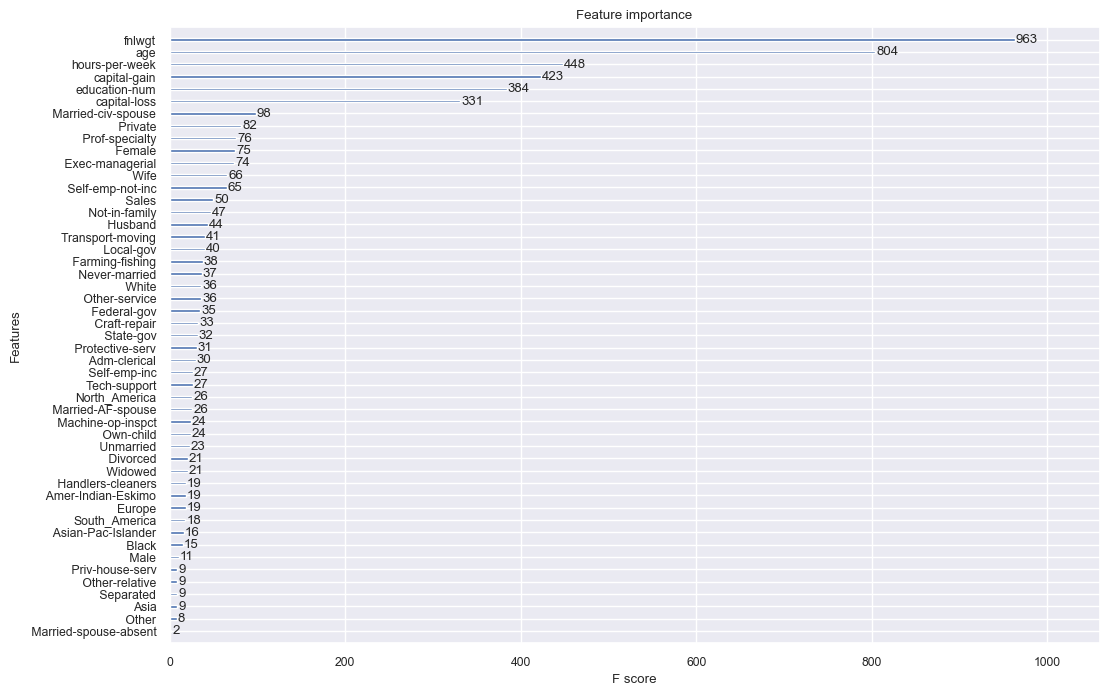

In [182]:
#Step1: Fix learning rate and number of estimators for tuning tree-based parameters
xgb1 = xgb.XGBClassifier(learning_rate = 0.1, n_estimators = 500, max_depth = 5, min_child_weight = 1, gamma = 0, 
                         subsample = 0.8, colsample_bytree = 0.8, objective = 'binary:logistic', seed = 27)
model = modelfit(xgb1, X, y, Xtest, ytest)

For initial parameters set, 87% accuracy and 0.926582 AUC score have been achieved.

From the feature importance plot above, the top five influence factors are 'fnlwgt', 'age', 'hour-per-week', 'capital-gain/loss', 'education-num'.

##### Next Step: Improve XGBoost model by parameter tuning

In [160]:
from sklearn.model_selection import GridSearchCV

In [183]:
#Step 2: Tune max_depth and min_child_weight
param_test1 = {'max_depth': range(3,10,2), 'min_child_weight': range(1,6,2)}

gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate = 0.1, n_estimators = 500, gamma = 0, 
                         subsample = 0.8, colsample_bytree = 0.8, objective = 'binary:logistic', seed = 127), 
 param_grid = param_test1, scoring='accuracy',cv=5)
gsearch1.fit(X.values, y.values)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=500, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=127,
                                     subsample=0.8, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy')

In [185]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 3, 'min_child_weight': 3}, 0.8698696608460337)

In [189]:
# Step 3: Tune gamma
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch2 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=400, max_depth=3,
 min_child_weight=3, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', seed=27), 
 param_grid = param_test2, scoring='accuracy',n_jobs=-1, cv=5)
gsearch2.fit(X.values, y.values)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype inste

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=3, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=400, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=27,
                                     subsample=0.8, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             n_jobs=-1, param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             scoring='accuracy')

In [190]:
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.4}, 0.8696374939183759)

In [193]:
# Step 4: Tune subsample and colsample_bytree
param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch3 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators= 500, max_depth=3,
 min_child_weight=3, gamma=0.4, objective= 'binary:logistic',seed=127), 
 param_grid = param_test3, scoring='accuracy',n_jobs=-1, cv=5)
gsearch3.fit(X.values, y.values)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=0.4,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=3, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=500, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=127,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'subsample': [0.6, 0.7, 0.8, 0.9]},
             scoring='accuracy')

In [194]:
gsearch3.best_params_, gsearch3.best_score_

({'colsample_bytree': 0.8, 'subsample': 0.9}, 0.8699028668712536)

In [195]:
# Step 5: Tune Regularization Parameters
param_test4 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch4 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=500, max_depth=3,
 min_child_weight=3, gamma=0.4, subsample=0.9, colsample_bytree=0.8,
 objective= 'binary:logistic',seed= 127), 
 param_grid = param_test4, scoring='accuracy',n_jobs=-1,cv=5)
gsearch4.fit(X.values, y.values)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype inste

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0.4,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=3, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=500, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=127,
                                     subsample=0.9, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             n_jobs=-1, param_grid={'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
             scoring='accuracy')

In [196]:
gsearch4.best_params_, gsearch4.best_score_

({'reg_alpha': 1e-05}, 0.8699028668712536)

Finally, afer getting the optimal parameters combination for model, let's fit on test dataset again to see if the accuracy has any obvious improvement.


Model Report
Accuracy : 0.8721
AUC Score (Test): 0.926938


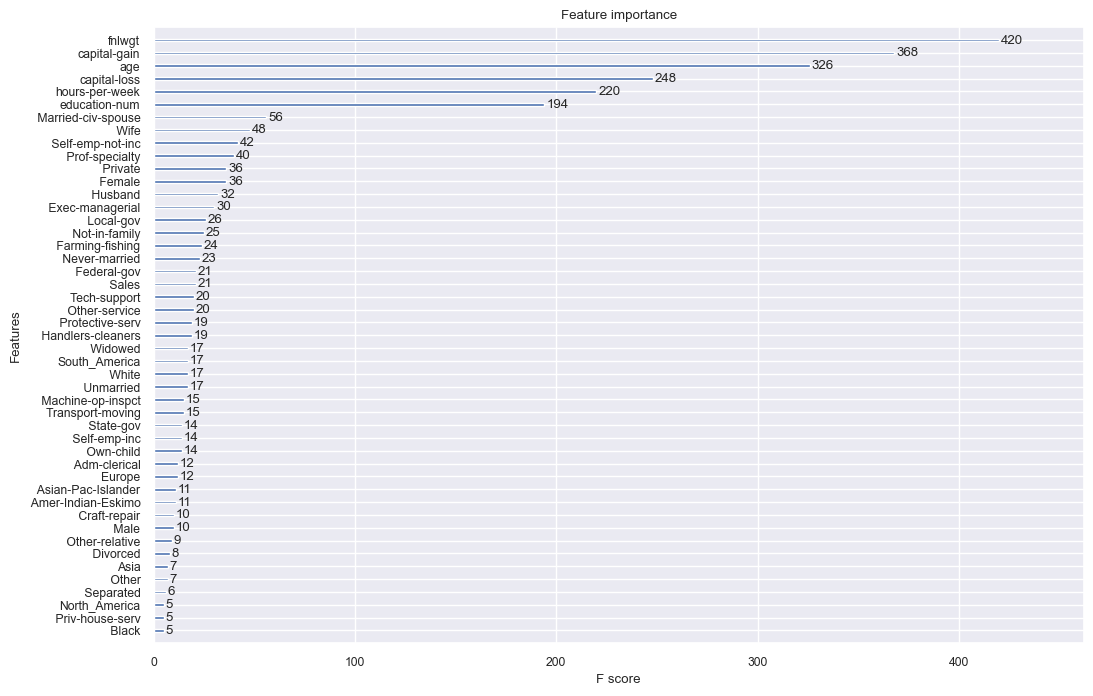

In [197]:
xgb2 = xgb.XGBClassifier( learning_rate =0.1, n_estimators=500, max_depth=3,
 min_child_weight=3, gamma=0.4, subsample=0.9, colsample_bytree=0.8,
 objective= 'binary:logistic',seed= 127)
num = modelfit(xgb2, X, y, Xtest, ytest)

Before parameter tuning:
 
    Accuracy : 0.8711

    AUC Score (Test): 0.926582

After parameter tuning:

    Accuracy : 0.8721

    AUC Score (Test): 0.926938

Conclusion: there is very limited improvement for XGBoost model performance. From my previous experience, once a model is selected, what can really make a difference is the data preprocessing and features selection step. In most cases, the improvement achieved by parameters tuning is not significant. It suggests that as a data scientist, we should put more effort on preparing the dataset for model. 

##### plot confusion matrix

In [203]:
from sklearn.metrics import plot_confusion_matrix

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


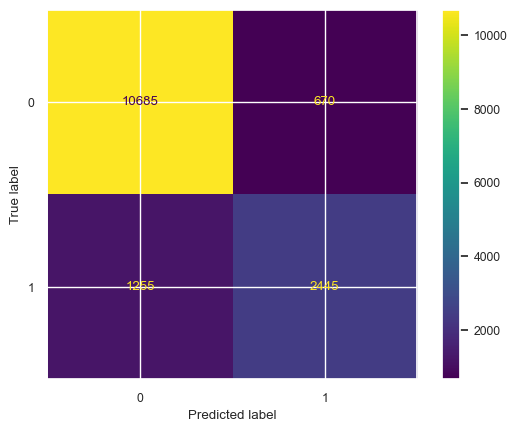

In [206]:
plot_confusion_matrix(xgb2, Xtest, ytest)
plt.show()